Importing the libraries

In [ ]:
!pip install demoji
import numpy as np 
from google.colab import data_table
import seaborn as sns
import pandas as pd 
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer,PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
import demoji
import nltk
nltk.download('stopwords') 
import plotly.express as px

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mounting the drive inorder to access the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Read the csv file using pandas

In [ ]:
df = pd.read_csv("/content/gdrive/Shareddrives/ADBI_Capstone/data/cyberbullying_tweets.csv")
display(df)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


Describe method returns the description of the data in the database

In [ ]:
#@title Data Description  { vertical-output: true, display-mode: "both" }
df.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,RT @sailorhg: the intro for my hardware hackin...,religion
freq,2,7998


Value_counts is used to return the count of the unique rows in the database

In [ ]:
#@title CyberBullying Type Counts  { run: "auto", vertical-output: true, display-mode: "both" }
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

Use plot method to get the visual representation of the data and specify the type of plot 

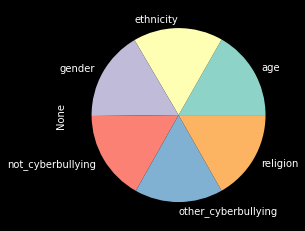

In [ ]:
#@title Distribution according to cyber bullying categories  { run: "auto", vertical-output: true, display-mode: "both" }
plt.style.use('dark_background')
df.groupby('cyberbullying_type').size().plot(kind='pie')

Use Box plot to visualize the size of the tweet for each category

In [ ]:
#@title Tweet length for each category { run: "auto", vertical-output: true }
df['tweet_length'] = df['tweet_text'].apply(lambda x: len(x.split()))
box_plot = px.box(df,
             x = 'cyberbullying_type',
             y = 'tweet_length',
             color = 'cyberbullying_type',
             color_discrete_sequence = px.colors.diverging.curl,
             template = 'plotly_dark',
             )
box_plot.update_yaxes(range = [0,80])
box_plot.show()

Plot different work clouds for different cyberbullying categories

 
RELIGION


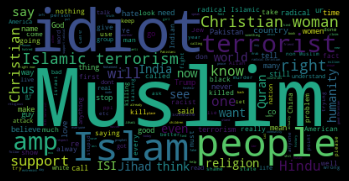

 
GENDER


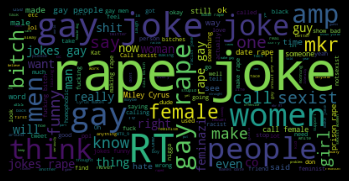

 
ETHNICITY


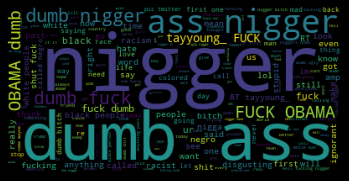

 
AGE


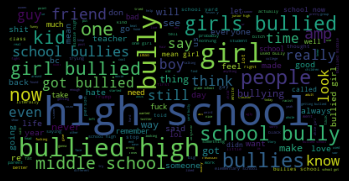

 
OTHER


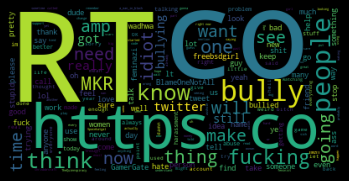

 
NON-BULLYING


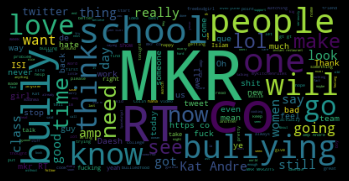

In [ ]:
#@title Word Cloud for different cyberbullying categories  { run: "auto", vertical-output: true, display-mode: "both" }
Category = ["Religion","Gender","Ethnicity","Age","Other","Non-bullying"]
Type = ['religion','gender','ethnicity','age','other_cyberbullying','not_cyberbullying']
for c in range(len(Category)):
    print(" ")
    print(Category[c].upper())
    text = " ".join(review for review in df[df.cyberbullying_type==Type[c]].tweet_text.astype(str))
    wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Apply data cleaning to the given data and generate bar plots for each bullying type

In [ ]:

#@title Top words for each bullying type { run: "auto", vertical-output: true, display-mode: "both" }
stop_words = set(stopwords.words('english'))
stop_words.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will', 'wa', 'e', 'like'])
#reduce the words to it's base word
word_stemmer = SnowballStemmer('english')

def data_cleaning(text):
    
    # Remove symbols like hashtag, URLs and mentions
    remove_sym = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = " ".join((remove_sym.sub('', text)).split())
    
    #Apply stemming to the text generated after removing the symbols
    text = " ".join([word_stemmer.stem(word) for word in text.lower().split()])
    
    #Apply a regex to remove all the punctuations from the text
    clean_text = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = clean_text.sub('', text)
    
    #Remove the stop words usingthe STOPWORDS list
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
    #Check the emojis and maintain them 
    emoji = demoji.findall(text)
    for emot in emoji:
        text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)

    return text

#Plot the bar plots for each bullying category using the top 10 words used for each of them
cyberbullying_type = df.cyberbullying_type.unique()
for c_type in cyberbullying_type:
            
    df['cleaned_text'] = df['tweet_text'].apply(lambda text: data_cleaning(text))
    top50_word = df.cleaned_text[df.cyberbullying_type==c_type].str.split(expand=True).stack().value_counts()[:10]
    bar_plot = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.haline, custom_data=[top50_word.values])
    bar_plot.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    bar_plot.update_layout(title=f"Top 10 words for {c_type}",
                     template = 'plotly_dark',
                     hovermode='x unified')
    bar_plot.show()

Find out the most frequently appeared usernames in the tweets

In [ ]:
#@title Most frequently appearing usernames in the tweets { run: "auto", vertical-output: true, display-mode: "both" }

#Extract the feature using the given input
def Feature_Extraction(Sym):
        Feature = []
        Tweets = df['tweet_text'].tolist()
        for i in Tweets:
            tweet = i.split()
            for j in tweet:
                if j.startswith(Sym):
                    Feature.append(j)                                    
        return Feature
#Get the username and the count in separate lists
def Column_count(sym):
        username = []
        count = []
        for user in Counter(Feature_Extraction(sym)).keys():
            username.append(user)   
        for value in Counter(Feature_Extraction(sym)).values():
            count.append(value)
        return username, count
#Use dataframe feature of pandas to display the username and the count in descending order
def Username_count_DataFrame():
        username, count = Column_count('@')
        df = pd.DataFrame([username, count], index = ['Username', 'Count']).T
        df = df.sort_values(by='Count', ascending=False)
        return data_table.DataTable(df, include_index=False, num_rows_per_page=20)
Username_count_DataFrame()

,Username,Count
10850,@tayyoung_:,480
70,@freebsdgirl,221
24,@MaxBlumenthal,160
138,@MT8_9,100
51,@IsraeliRegime,99
...,...,...
5691,@CreaseyLuke,1
5692,@RHoward617:,1
5693,@RossBarnes9,1
5694,@Tom_Greenbean,1


Find the top hashtags and generate their counts in the descending order

In [ ]:
#@title Top hashtags and their count  { run: "auto", vertical-output: true, display-mode: "both" }

#Use dataframe feature of pandas to display the top hashtags and the count in descending order
def Hashtag_count_DataFrame():
        Hashtag, count = Column_count('#')
        df = pd.DataFrame([Hashtag, count], index = ['Hashtag', 'Count']).T
        df = df.sort_values(by='Count', ascending=False)
        return data_table.DataTable(df, include_index=False, num_rows_per_page=20)

Hashtag_count_DataFrame()

,Hashtag,Count
3,#MKR,1276
1,#mkr,1152
283,#Islam,131
1180,#BlameOneNotAll,107
335,#notsexist,101
...,...,...
2011,#RejectedOlympicEvents,1
2012,#dumbslut,1
2013,#justobservant,1
2016,#TGMVR,1
